In [81]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD

In [10]:
sample = pd.read_csv("sample_submission.csv",encoding = "ISO-8859-1")
sample.head(2)

,id,target
0,0,0
1,2,0


In [11]:
test_limpio = pd.read_csv("test_limpio_con_Tf-Idf.csv",encoding = "ISO-8859-1")
test_limpio.head(2)

,aba,abandon,abc,abcnew,abl,ablaz,absolut,abstorm,abus,access,...,your,youth,youtub,youv,yr,yrs,yyc,zionist,zombi,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
train_limpio = pd.read_csv("train_limpio_con_Tf-Idf.csv",encoding = "ISO-8859-1")
train_limpio.head(2)

,aba,abandon,abc,abcnew,abl,ablaz,absolut,abstorm,abus,access,...,youth,youtub,youv,yr,yrs,yyc,zionist,zombi,zone,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [82]:
svd = TruncatedSVD(n_components=100, random_state=42)
new_train = svd.fit_transform(train_limpio) 

In [86]:
new_train = pd.DataFrame(new_train)

In [89]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 100 columns):
0     7613 non-null float64
1     7613 non-null float64
2     7613 non-null float64
3     7613 non-null float64
4     7613 non-null float64
5     7613 non-null float64
6     7613 non-null float64
7     7613 non-null float64
8     7613 non-null float64
9     7613 non-null float64
10    7613 non-null float64
11    7613 non-null float64
12    7613 non-null float64
13    7613 non-null float64
14    7613 non-null float64
15    7613 non-null float64
16    7613 non-null float64
17    7613 non-null float64
18    7613 non-null float64
19    7613 non-null float64
20    7613 non-null float64
21    7613 non-null float64
22    7613 non-null float64
23    7613 non-null float64
24    7613 non-null float64
25    7613 non-null float64
26    7613 non-null float64
27    7613 non-null float64
28    7613 non-null float64
29    7613 non-null float64
30    7613 non-null float64
31    7613 non-null floa

In [13]:
df_x=train_limpio.drop(['target'], axis=1)
df_x.describe()

,aba,abandon,abc,abcnew,abl,ablaz,absolut,abstorm,abus,access,...,your,youth,youtub,youv,yr,yrs,yyc,zionist,zombi,zone
count,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,...,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,0.000755,0.000725,0.001275,0.000254,0.000542,0.001572,0.000937,0.000444,0.000518,0.000371,...,0.002967,0.001090,0.004363,0.000438,0.000271,0.000364,0.000539,0.000334,0.000423,0.001743
std,0.017632,0.017119,0.022379,0.010220,0.015334,0.026627,0.021498,0.012953,0.015531,0.011518,...,0.034504,0.021639,0.039766,0.014848,0.010710,0.012082,0.015224,0.012014,0.015595,0.027428
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.501049,0.551284,0.472889,0.566301,0.626706,0.689957,0.630251,0.420204,0.681358,0.455004,...,0.673207,0.680019,0.700773,0.707107,0.488799,0.475938,0.659785,0.543324,0.769692,0.586498


In [14]:
df_y=train_limpio.target

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.1, random_state=4)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=19)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [76]:
y_pred = classifier.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[342  89]
 [120 211]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.77       431
           1       0.70      0.64      0.67       331

    accuracy                           0.73       762
   macro avg       0.72      0.72      0.72       762
weighted avg       0.72      0.73      0.72       762



In [49]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

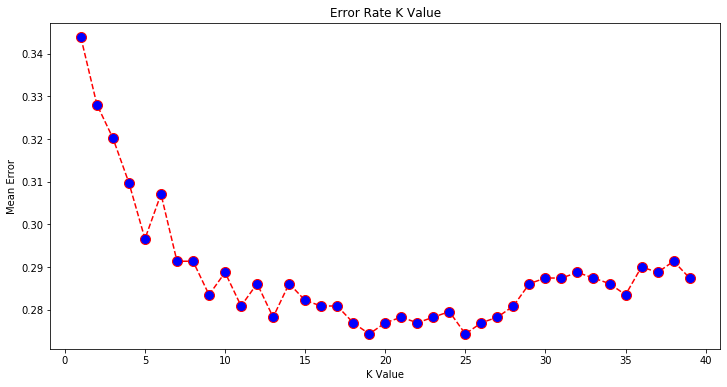

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')